# ANZ Data EDA

## Goals
- Check for any issue, error, outliers, etc.
- Anlayze the data and find attributes that correlate to the salary
- Create a model to predict the yearly salary

## Data
containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

In [283]:
# libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Read File

In [284]:
# Declare path & filename
dir = '../data'
file_name = 'ANZ synthesised transaction dataset.xlsx'
path = os.path.join(dir, file_name)

In [285]:
# read the file
df = pd.read_excel(path)

In [286]:
# check first 5 record
df.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Exploratory Data Analysis

In this part, we're going to find issues, insight, and pattern in the data.

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [288]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [289]:
print(min(df.date))
print(max(df.date))

2018-08-01 00:00:00
2018-10-31 00:00:00


## Exploring Columns

These top and lowest transation of an account.

In [290]:
for col in df.columns:
    print(col)

status
card_present_flag
bpay_biller_code
account
currency
long_lat
txn_description
merchant_id
merchant_code
first_name
balance
date
gender
age
merchant_suburb
merchant_state
extraction
amount
transaction_id
country
customer_id
merchant_long_lat
movement


Checking out columns unique values, to find possible values to explore

In [291]:
cols = ['status', 'currency', 'txn_description', 'gender', 'extraction', 'country', 'movement']
for col in cols:
    print(col)
    print(df[col].unique())


status
['authorized' 'posted']
currency
['AUD']
txn_description
['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']
gender
['F' 'M']
extraction
['2018-08-01T01:01:15.000+0000' '2018-08-01T01:13:45.000+0000'
 '2018-08-01T01:26:15.000+0000' ... '2018-10-31T23:34:25.000+0000'
 '2018-10-31T23:47:05.000+0000' '2018-10-31T23:59:44.000+0000']
country
['Australia']
movement
['debit' 'credit']


In [292]:
# filtering out the PAY/SALARY that we wanted to predict
salary_df = df[df['txn_description'] == 'PAY/SALARY']
print(len(salary_df))

883


In [293]:
salary_df.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


In [294]:
corr = salary_df[['balance', 'age', 'amount']].corr()

<AxesSubplot:>

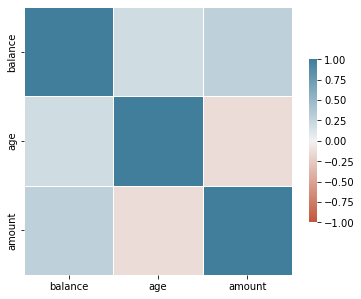

In [295]:
# finding correlation between the  attributes
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(20, 230, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.7, cbar_kws={"shrink": .5})

In [296]:
# get unecesarry columns
important = []
for col in df.columns:
    unique_values =  salary_df[col].unique()
    # if the unique values more than 1, which mean not unqiue, add it to important list 
    if len(unique_values) >1:
        important.append(col)

In [297]:
salary_df.head(4)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit


In [298]:
# filtered out unimportant columns
filtered_salary_df = salary_df[important]

In [299]:
filtered_salary_df.head(5)

,account,long_lat,first_name,balance,date,gender,age,extraction,amount,transaction_id,customer_id
50,ACC-588564840,151.27 -33.76,Isaiah,8342.11,2018-08-01,M,23,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821
61,ACC-1650504218,145.01 -37.93,Marissa,2040.58,2018-08-01,F,23,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281
64,ACC-3326339947,151.18 -33.80,Eric,3158.51,2018-08-01,M,22,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476
68,ACC-3541460373,145.00 -37.83,Jeffrey,2517.66,2018-08-01,M,24,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684
70,ACC-2776252858,144.95 -37.76,Kristin,2271.79,2018-08-01,F,43,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273


In [300]:
filtered_salary_df.sort_values(by='account').head(5)

,account,long_lat,first_name,balance,date,gender,age,extraction,amount,transaction_id,customer_id
10816,ACC-1037050564,153.10 -27.66,Rhonda,5524.86,2018-10-22,F,40,2018-10-22T11:00:00.000+0000,892.09,05a4c832470f4a5aad166b965be8862c,CUS-1614226872
11749,ACC-1037050564,153.10 -27.66,Rhonda,6065.02,2018-10-29,F,40,2018-10-29T11:00:00.000+0000,892.09,e7e999056a1f4afdac171426e96c58ee,CUS-1614226872
8937,ACC-1037050564,153.10 -27.66,Rhonda,4545.77,2018-10-08,F,40,2018-10-08T11:00:00.000+0000,892.09,cbd08944c11c413ea210dcca994274e9,CUS-1614226872
5185,ACC-1037050564,153.10 -27.66,Rhonda,3724.18,2018-09-10,F,40,2018-09-10T11:00:00.000+0000,892.09,1cbbcb140c64400fb52801626b1631f4,CUS-1614226872
7056,ACC-1037050564,153.10 -27.66,Rhonda,4465.56,2018-09-24,F,40,2018-09-24T11:00:00.000+0000,892.09,73e282fb810d4273b5482aa4c3cc601a,CUS-1614226872


In [301]:
# removed unecessary collumns
filtered_salary_df = filtered_salary_df.drop(columns=['transaction_id', 'customer_id', 'long_lat', 'first_name', 'extraction'])

In [302]:
filtered_salary_df.head(5)

,account,balance,date,gender,age,amount
50,ACC-588564840,8342.11,2018-08-01,M,23,3903.95
61,ACC-1650504218,2040.58,2018-08-01,F,23,1626.48
64,ACC-3326339947,3158.51,2018-08-01,M,22,983.36
68,ACC-3541460373,2517.66,2018-08-01,M,24,1408.08
70,ACC-2776252858,2271.79,2018-08-01,F,43,1068.04


### Exploring Correlation or Pattern of customer to the Salary

Using visualization to figure out if salary is affected by gender, age, etc.

<AxesSubplot:xlabel='amount', ylabel='gender'>

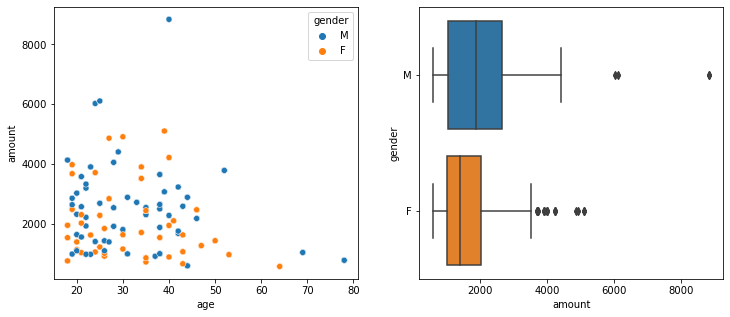

In [303]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(data=filtered_salary_df, x="age", y="amount", hue="gender", ax=axes[0])
sns.boxplot(data=filtered_salary_df, x="amount", y="gender", ax=axes[1])

Fromt the visualization above, we could see that there are no strong correlation between age and ammount. On the other hand, age give us a 

In [304]:
df[df['account'] == 'ACC-1037050564'].head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
30,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,POS,02d45834-6f65-4f52-9a33-0b242dd7a078,NaN,Rhonda,...,40,North Lakes,QLD,2018-08-01T09:15:03.000+0000,45.12,ad101b96b9d44b968b2519e2bb26a649,Australia,CUS-1614226872,152.99 -27.21,debit
40,posted,NaN,NaN,ACC-1037050564,AUD,153.10 -27.66,PAYMENT,NaN,NaN,Rhonda,...,40,NaN,NaN,2018-08-01T10:00:00.000+0000,32.00,94622881419c44e1b799a52d82572207,Australia,CUS-1614226872,NaN,debit
76,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,1ab3e343-3775-4d54-9dac-2b0834500025,NaN,Rhonda,...,40,Port Macquarie,NSW,2018-08-01T14:28:14.000+0000,11.05,353c30ef66e345059a22305b36f138a2,Australia,CUS-1614226872,152.92 -31.43,debit
124,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,3de54244-f7ba-46c9-aa99-01bd54625d25,NaN,Rhonda,...,40,Brisbane Airport,QLD,2018-08-01T20:09:28.000+0000,65.11,fe3610e9d3ab418bba2ae7a62c56bc97,Australia,CUS-1614226872,153.12 -27.39,debit


In [305]:
spending = df[df['txn_description'] != 'PAY/SALARY']

In [306]:
spending['month'] = spending['date'].apply(lambda date: 
    date.month
)

/tmp/ipykernel_10405/4157500905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending['month'] = spending['date'].apply(lambda date:


In [307]:
spending['week'] = spending['date'].apply(lambda date: 
    date.week
)

/tmp/ipykernel_10405/3916652578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending['week'] = spending['date'].apply(lambda date:


In [308]:
spending = spending[['account','month', 'amount']]
result  = spending.groupby(by=['account', 'month']).agg('sum')
result

amount
account        month         
ACC-1037050564 8      2804.61
               9      2835.75
               10     2048.91
ACC-1056639002 8      1392.56
               9      1560.84
...                       ...
ACC-964839203  9      3272.72
               10     1319.69
ACC-966140392  8      2438.95
               9      1403.66
               10     1663.22

[299 rows x 1 columns]

In [309]:
result = result.reset_index()

In [310]:
result.head(10)

,account,month,amount
0,ACC-1037050564,8,2804.61
1,ACC-1037050564,9,2835.75
2,ACC-1037050564,10,2048.91
3,ACC-1056639002,8,1392.56
4,ACC-1056639002,9,1560.84
5,ACC-1056639002,10,678.13
6,ACC-1199531521,8,1196.57
7,ACC-1199531521,9,3391.02
8,ACC-1199531521,10,1155.12
9,ACC-1217063613,8,42.02


In [311]:
salary = df[df['txn_description'] == 'PAY/SALARY']
salary.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


In [312]:
salary['month'] = salary['date'].apply(lambda date: 
    date.month
)

/tmp/ipykernel_10405/1676202727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['month'] = salary['date'].apply(lambda date:


In [313]:
salary.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'month'],
      dtype='object')

In [314]:
salary = salary[['account','month','gender','amount']]

In [315]:
salary = salary.groupby(by=['account','month','gender']).agg('sum')
salary = salary.reset_index()

In [316]:
salary

,account,month,gender,amount
0,ACC-1037050564,8,F,3568.36
1,ACC-1037050564,9,F,3568.36
2,ACC-1037050564,10,F,4460.45
3,ACC-1056639002,8,M,6390.02
4,ACC-1056639002,9,M,6390.02
...,...,...,...,...
291,ACC-964839203,9,M,6240.80
292,ACC-964839203,10,M,6240.80
293,ACC-966140392,8,M,7718.73
294,ACC-966140392,9,M,5145.82


In [317]:
result

,account,month,amount
0,ACC-1037050564,8,2804.61
1,ACC-1037050564,9,2835.75
2,ACC-1037050564,10,2048.91
3,ACC-1056639002,8,1392.56
4,ACC-1056639002,9,1560.84
...,...,...,...
294,ACC-964839203,9,3272.72
295,ACC-964839203,10,1319.69
296,ACC-966140392,8,2438.95
297,ACC-966140392,9,1403.66


In [318]:
salary = salary.rename(columns={"amount": "monthly_salary"})
result = result.rename(columns={"amount": "monthly_expenses"})

In [319]:
final_df = salary.merge(result, on=['account','month'], how="left")

In [320]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 295
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           296 non-null    object 
 1   month             296 non-null    int64  
 2   gender            296 non-null    object 
 3   monthly_salary    296 non-null    float64
 4   monthly_expenses  295 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 13.9+ KB


In [321]:
final_df

,account,month,gender,monthly_salary,monthly_expenses
0,ACC-1037050564,8,F,3568.36,2804.61
1,ACC-1037050564,9,F,3568.36,2835.75
2,ACC-1037050564,10,F,4460.45,2048.91
3,ACC-1056639002,8,M,6390.02,1392.56
4,ACC-1056639002,9,M,6390.02,1560.84
...,...,...,...,...,...
291,ACC-964839203,9,M,6240.80,3272.72
292,ACC-964839203,10,M,6240.80,1319.69
293,ACC-966140392,8,M,7718.73,2438.95
294,ACC-966140392,9,M,5145.82,1403.66


<AxesSubplot:xlabel='monthly_salary', ylabel='monthly_expenses'>

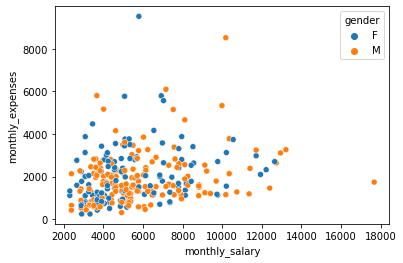

In [329]:
sns.scatterplot(data=final_df, x='monthly_salary', y='monthly_expenses', hue="gender")